In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Sucess')

Sucess


In [2]:
# Load Dataset
file_path = "../CSV/Global_Superstore(CSV).csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

In [3]:
# Data Cleaning
## Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

## Remove duplicates
df.drop_duplicates(inplace=True)

## Convert Date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Sales'] = df['Sales'].fillna(df['Sales'].median())
df['Profit'] = df['Profit'].fillna(df['Profit'].median())
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])
df['Category'] = df['Category'].fillna(df['Category'].mode()[0])

## Remove duplicates
df.drop_duplicates(inplace=True)

In [4]:
# Handle outliers using IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    df = remove_outliers(df, col)

In [5]:
# Statistical Analysis
print("Summary Statistics:\n", df[['Sales','Profit']].corr().describe())
corr_matrix = df[['Sales','Profit']].corr()
print("\nCorrelation Matrix:\n", corr_matrix)

Summary Statistics:
           Sales    Profit
count  2.000000  2.000000
mean   0.720548  0.720548
std    0.395205  0.395205
min    0.441096  0.441096
25%    0.580822  0.580822
50%    0.720548  0.720548
75%    0.860274  0.860274
max    1.000000  1.000000

Correlation Matrix:
            Sales    Profit
Sales   1.000000  0.441096
Profit  0.441096  1.000000


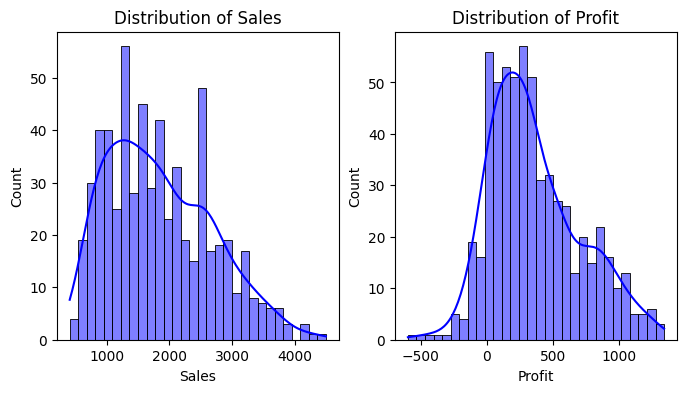

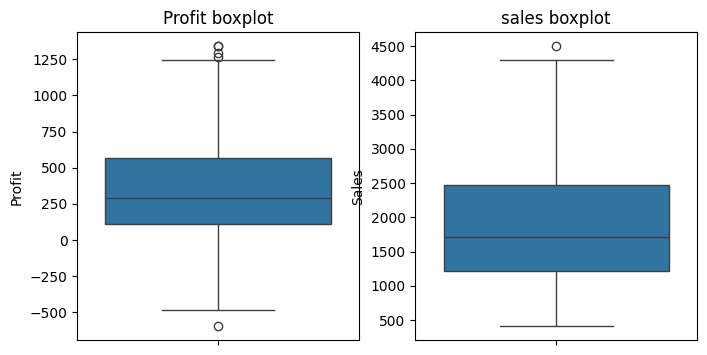

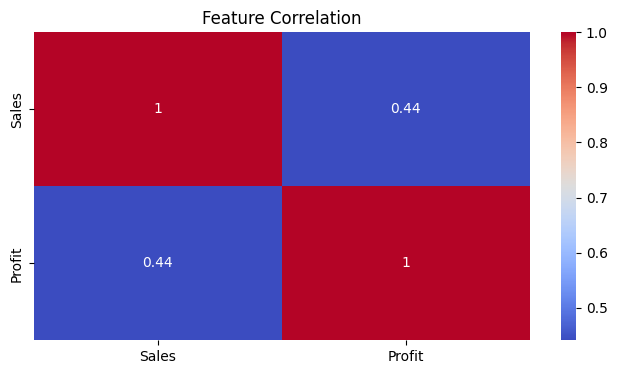

In [7]:
# Data Visualization
# histogram for numerical like 'sales' and 'profit'
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df['Sales'],kde=True, bins=30, color="blue")
plt.title('Distribution of Sales')
plt.subplot(1,2,2)
sns.histplot(df['Profit'],kde=True, bins=30, color="blue")
plt.title('Distribution of Profit')

# Boxplot for detecting outliers in sales and profit
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
sns.boxplot(data=df['Profit'])
plt.title("Profit boxplot")

plt.subplot(1,2,2)
sns.boxplot(data=df['Sales'])
plt.title("sales boxplot")
plt.show()

# Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [4]:
# Save cleaned data
df.to_csv("cleaned_dataset.csv", index=False)